In [189]:
# pip install --upgrade scikit-learn numpy scipy


In [190]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [191]:
df=pd.read_csv(r"C:\Users\HP\Desktop\vs_projects\softsensor assignment\Data_problem  1.csv")

In [192]:
np.where(df['CREDIT_LIMIT'].isna())
df.iloc[5200:5205]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5200,C15346,87.887472,1.000000,1282.73,0.00,1282.73,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,3500.0,1347.512780,177.102986,0.818182,12
5201,C15347,5194.184491,1.000000,73.42,73.42,0.00,1101.178394,0.083333,0.083333,0.000000,0.166667,3,1,9500.0,1465.747485,1141.633296,0.000000,12
5202,C15348,216.705656,1.000000,1442.90,424.60,1018.30,0.000000,1.000000,0.666667,0.833333,0.000000,0,29,4000.0,1111.898226,87.775306,1.000000,6
5203,C15349,18.400472,0.166667,0.00,0.00,0.00,186.853063,0.000000,0.000000,0.000000,0.166667,1,0,NaN,9.040017,14.418723,0.000000,6
5204,C15350,5829.927670,1.000000,0.00,0.00,0.00,306.064982,0.000000,0.000000,0.000000,0.250000,4,0,6500.0,1438.895280,2351.635775,0.000000,12


k

In [193]:
df[['PURCHASES','ONEOFF_PURCHASES']]
sum(df['ONEOFF_PURCHASES']!=0)/df.shape[0]
max(df['PURCHASES_FREQUENCY'])

1.0

In [194]:
# dropped_df=df.dropna()
# scaler=StandardScaler()
# scaled_df=scaler.fit_transform(dropped_df.drop(columns='CUST_ID'))

# kmeans=KMeans(4)
# clusters=kmeans.fit(np.array(scaled_df))
# clustered_df=dropped_df.copy()
# clustered_df['Cluster']=kmeans.labels_

In [195]:
customizeddf=df.copy()

imputer = KNNImputer(n_neighbors=5) 
customizeddf[customizeddf.columns[1:]]= imputer.fit_transform(customizeddf[customizeddf.columns[1:]])

In [196]:
customizeddf['monthly_average_purchase']=customizeddf['PURCHASES']/customizeddf['TENURE']
customizeddf['monthly_average_payments']=customizeddf['PAYMENTS']/customizeddf['TENURE']
customizeddf['balance_to_creditlimit_ratio']=customizeddf['BALANCE']/customizeddf['CREDIT_LIMIT']

In [197]:
customizeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   float64
 12  PURCHA

In [198]:


# Standardize the data (excluding 'CUST_ID')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(customizeddf.drop(columns='CUST_ID'))


Cumulative Variance Explained by Factors: [0.93665777 1.8079773  2.52418141 3.17015651 3.63902875 4.04631059
 4.35048385 4.42927806 4.43807897 4.43807897 4.43807897 4.43807897
 4.43807897 4.43807897 4.43807897 4.43807897 4.43807897 4.43807897
 4.43807897 4.43807897]
Fraction of Explained Variance          : [0.21105027 0.40737835 0.56875541 0.71430827 0.81995584 0.91172569
 0.98026283 0.99801696 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


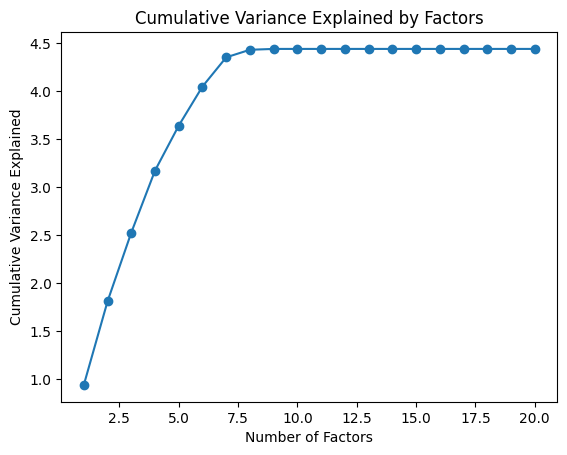

In [199]:
from sklearn.decomposition import FactorAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fit Factor Analysis model
n_factors = scaled_df.shape[1]
fa = FactorAnalysis(n_components=n_factors)
fa.fit(scaled_df)
factor_scores = fa.transform(scaled_df)

explained_variance = np.var(factor_scores, axis=0)

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Calculate total variance
# total_variance = np.var(scaled_df, axis=0).sum()  # Sum of variance for all features

# Fraction of variance explained
fraction_explained_variance = cumulative_variance / np.sum(explained_variance)

# Display cumulative variance
print("Cumulative Variance Explained by Factors:", cumulative_variance)
print("Fraction of Explained Variance          :", fraction_explained_variance)

# Plot cumulative variance
plt.plot(range(1, n_factors + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Factors')
plt.show()


In [200]:
#taking 5 factors
,

''

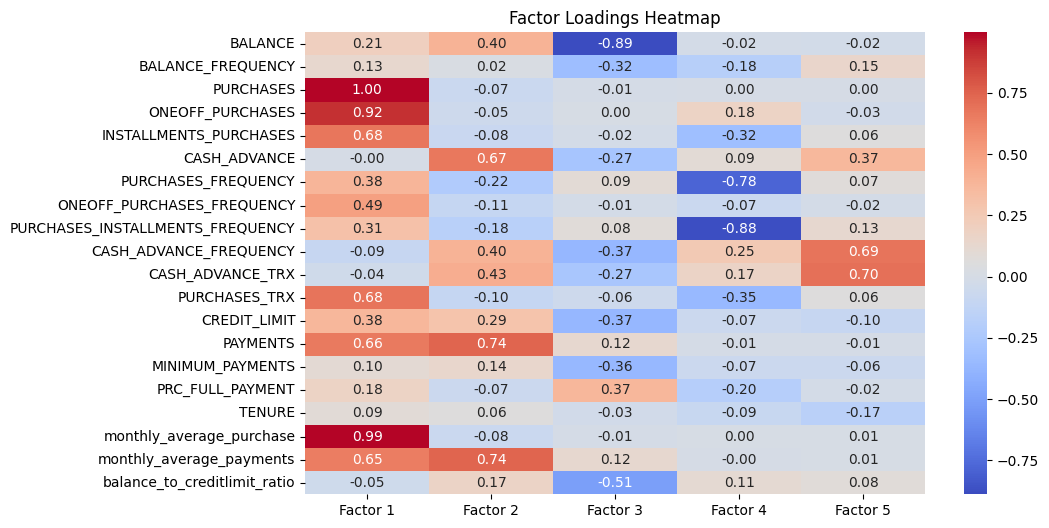

Cumulative Variance Explained by Factors: [0.99977339 1.9971523  2.98959756 3.92493193 4.78240788]
Fraction of Explained Variance          : [0.2090523  0.41760392 0.62512392 0.82070205 1.        ]


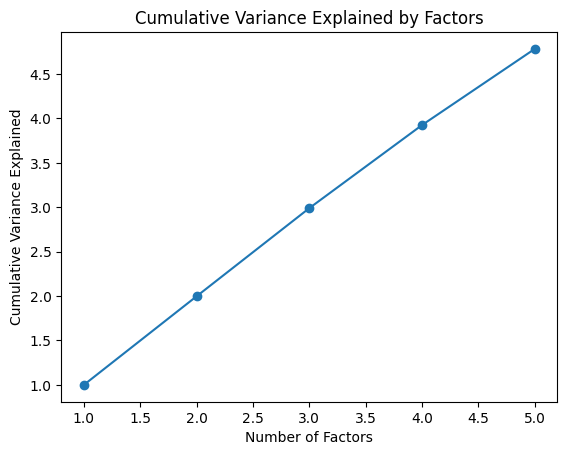

In [214]:
n_factors = 5
fa = FactorAnalysis(n_components=n_factors)
fa.fit(scaled_df)
factor_scores = fa.transform(scaled_df)

# Get factor loadings
factor_loadings = pd.DataFrame(
    fa.components_.T,  # Transpose to align variables with factors
    columns=[f'Factor {i+1}' for i in range(n_factors)],
    index=customizeddf.columns[1:]
)

# Display the loadings
# print(factor_loadings)

# Visualize the factor loadings
plt.figure(figsize=(10, 6))
sns.heatmap(factor_loadings, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Factor Loadings Heatmap")
plt.show()

# Calculate eigenvalues for explained variance
# The explained variance is the sum of squares of the factor loadings (each component's variance)
explained_variance = np.var(factor_scores, axis=0)

# Calculate cumulative variance
cumulative_variance = np.cumsum(explained_variance)

# Calculate total variance
# total_variance = np.var(scaled_df, axis=0).sum()  # Sum of variance for all features

# Fraction of variance explained
fraction_explained_variance = cumulative_variance / np.sum(explained_variance)

# Display cumulative variance
print("Cumulative Variance Explained by Factors:", cumulative_variance)
print("Fraction of Explained Variance          :", fraction_explained_variance)

# Plot cumulative variance
plt.plot(range(1, n_factors + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Factors')
plt.show()


In [215]:
factordf=pd.DataFrame()
factordf['CUST_ID']=customizeddf['CUST_ID']
factordf=pd.concat([factordf,pd.DataFrame(data=factor_scores)],axis=1)


In [217]:
# factordf.columns=['CUST_ID']+['Factor+',factordf.columns[i]}'/ for i in range(5)]
newcolumns=[]
for i in range(5):
    newcolumns.append(f'Factor {i+1}')
factordf.columns=['CUST_ID']+newcolumns

In [218]:
factordf

,CUST_ID,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
0,C10001,-0.454150,-0.398135,0.537178,0.672129,-0.520422
1,C10002,-0.365036,1.479764,-0.310341,0.555985,-0.326425
2,C10003,-0.132493,-0.300177,-0.640991,0.159638,-0.984606
3,C10004,0.163344,-0.872896,-0.421487,1.224998,-0.450377
4,C10005,-0.471926,-0.114715,0.241673,0.767013,-0.788150
...,...,...,...,...,...,...
8945,C19186,-0.356630,-0.428843,0.585583,-1.213525,0.197204
8946,C19187,-0.354443,-0.454965,0.572546,-1.180255,0.211620
8947,C19188,-0.432175,-0.478709,0.541430,-0.788864,0.054433
8948,C19189,-0.501232,-0.413545,0.514696,1.047923,0.181464


In [219]:
significantfeatures={}
THRESHOLD=0.4
for factor in factor_loadings.columns:
    
    positive_features = factor_loadings.index[np.where(factor_loadings[factor] > THRESHOLD)].tolist()

    negative_features = [feature for feature in factor_loadings.index[np.where(factor_loadings[factor] < -THRESHOLD)].tolist()]

    significantfeatures[factor] = 'positive correlation: '+str(positive_features) + '\nnegative correlation: '+str(negative_features)

significantfeatures

{'Factor 1': "positive correlation: ['PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'PAYMENTS', 'monthly_average_purchase', 'monthly_average_payments']\nnegative correlation: []",
 'Factor 2': "positive correlation: ['CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PAYMENTS', 'monthly_average_payments']\nnegative correlation: []",
 'Factor 3': "positive correlation: []\nnegative correlation: ['BALANCE', 'balance_to_creditlimit_ratio']",
 'Factor 4': "positive correlation: []\nnegative correlation: ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']",
 'Factor 5': "positive correlation: ['CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX']\nnegative correlation: []"}

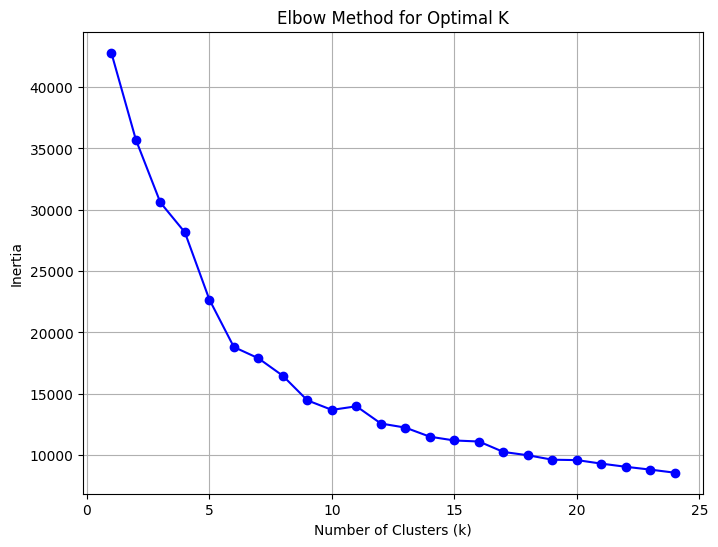

In [220]:


# Assuming dropped_df is your DataFrame and you already dropped NA

# Calculate Inertia for different values of k
inertia_values = []

# Test different k values (from 1 to 10 for example)
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(factordf.drop(columns=['CUST_ID']))
    inertia_values.append(kmeans.inertia_)

# Plot the Inertia values to find the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 25), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [221]:
inertia_values

[42802.55049616863,
 35719.64836048691,
 30593.32547690425,
 28161.54223671922,
 22678.968143259077,
 18809.427380832436,
 17891.543352627104,
 16461.415864070797,
 14460.454490799591,
 13682.409525970246,
 13977.409235001902,
 12570.931394672398,
 12238.275151514277,
 11495.61603532816,
 11188.613722275777,
 11105.286749175695,
 10253.586387984233,
 9982.976835515137,
 9620.729081016412,
 9589.145348909808,
 9300.774771472956,
 9042.493142522673,
 8812.641792314758,
 8560.187606030824]

In [222]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(factordf.drop(columns=['CUST_ID']))
clustered_df=factordf.copy()
clustered_df['Cluster']=kmeans.labels_

In [223]:
clustered_df

,CUST_ID,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Cluster
0,C10001,-0.454150,-0.398135,0.537178,0.672129,-0.520422,5
1,C10002,-0.365036,1.479764,-0.310341,0.555985,-0.326425,5
2,C10003,-0.132493,-0.300177,-0.640991,0.159638,-0.984606,5
3,C10004,0.163344,-0.872896,-0.421487,1.224998,-0.450377,5
4,C10005,-0.471926,-0.114715,0.241673,0.767013,-0.788150,5
...,...,...,...,...,...,...,...
8945,C19186,-0.356630,-0.428843,0.585583,-1.213525,0.197204,1
8946,C19187,-0.354443,-0.454965,0.572546,-1.180255,0.211620,1
8947,C19188,-0.432175,-0.478709,0.541430,-0.788864,0.054433,1
8948,C19189,-0.501232,-0.413545,0.514696,1.047923,0.181464,5


In [224]:
clustered_df['Cluster'].value_counts()

Cluster
5    4109
1    2910
0     849
3     770
4     211
2     101
Name: count, dtype: int64

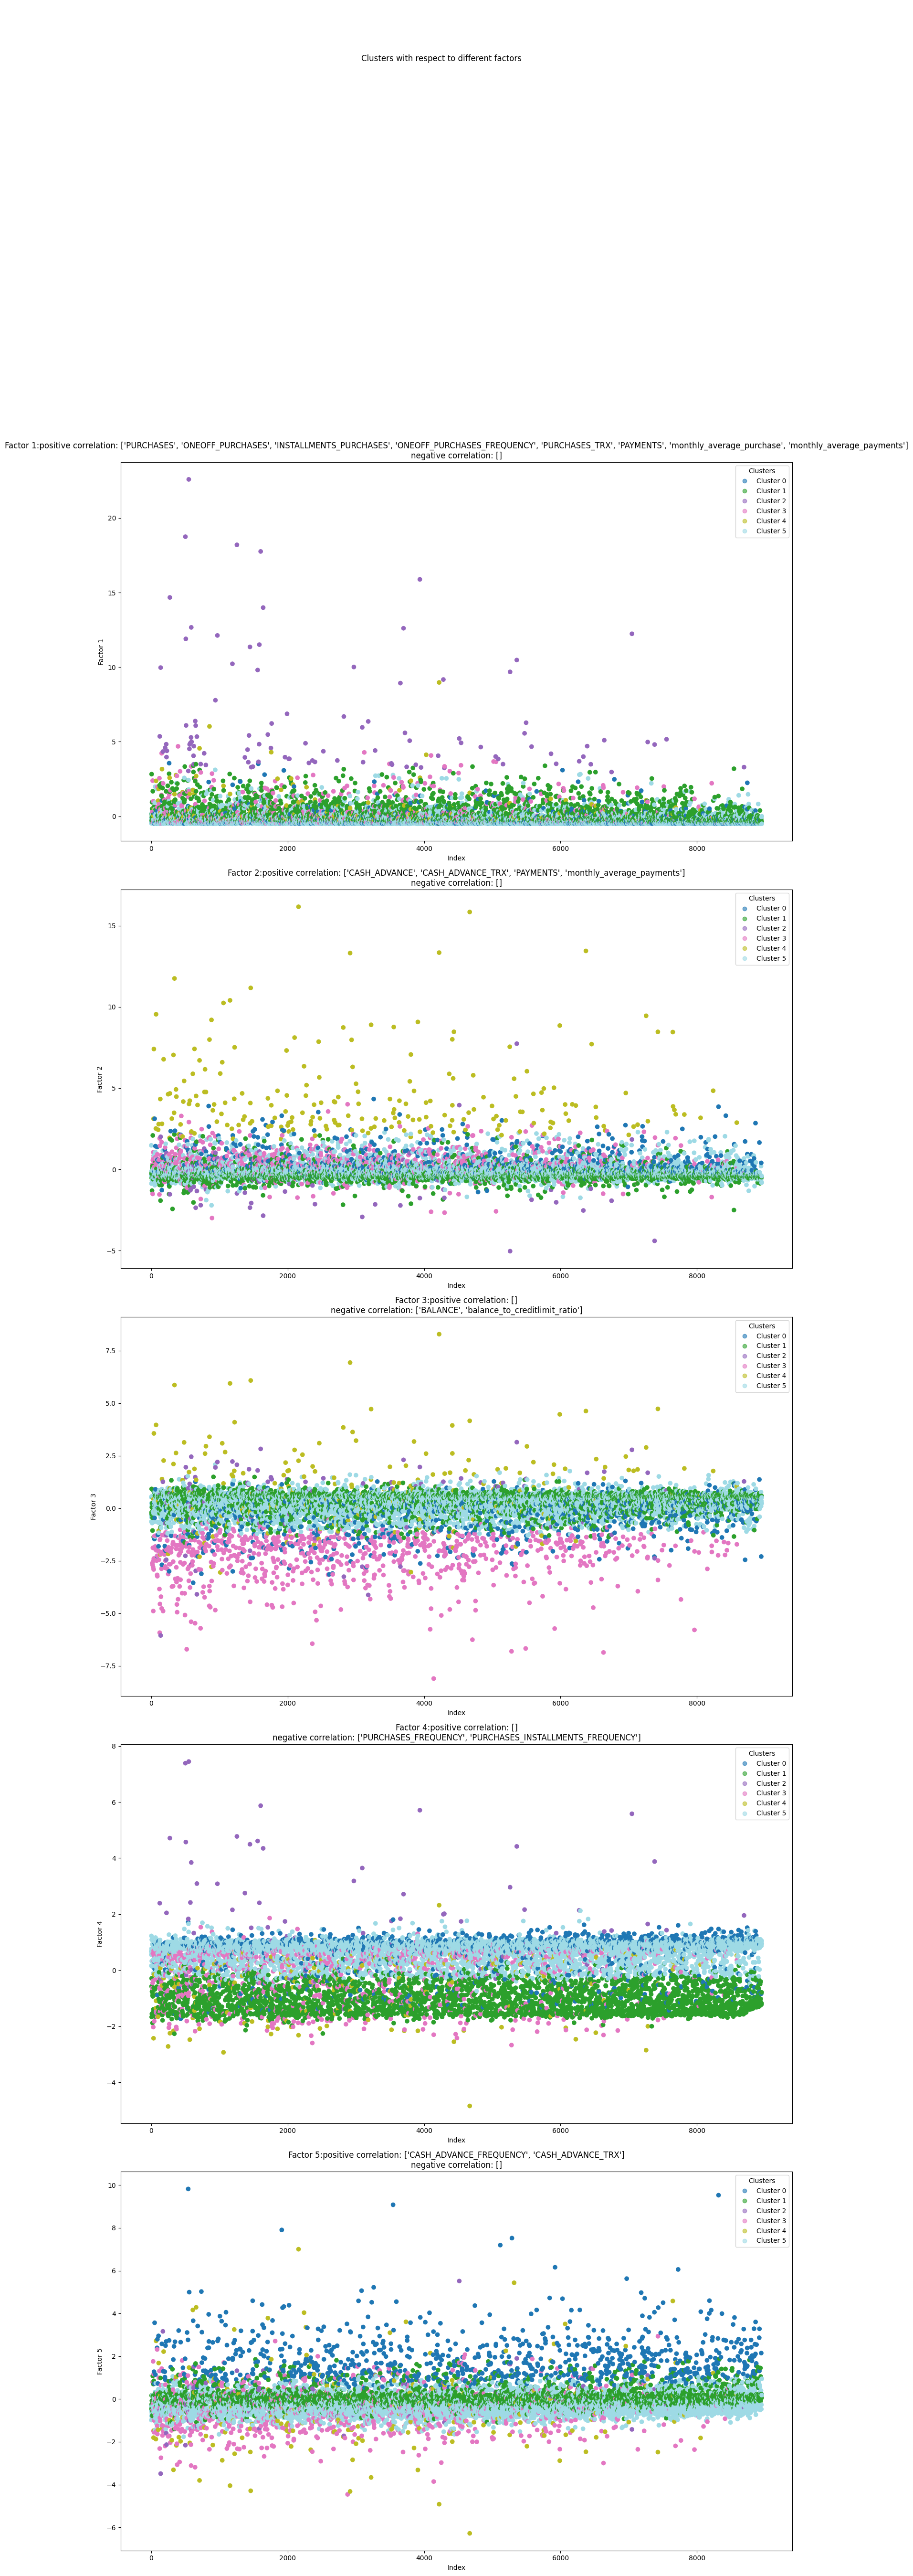

In [226]:
figurenumber=0

plt.figure(figsize=(15,55))
plt.suptitle('\n\n\n\n\nClusters with respect to different factors\n')
x=np.arange(1,factordf.shape[0]+1)
for i in range(5):
    plt.subplot(6,1, i + 2)  
    scatter=plt.scatter(x=x,y=factordf[factordf.columns[i+1]],c=clustered_df['Cluster'],cmap='tab20')
    plt.title(f'{factordf.columns[i+1]}:{significantfeatures[factordf.columns[i+1]]}')  
    plt.xlabel('Index') 
    plt.ylabel(factordf.columns[i+1])
    handles, labels = scatter.legend_elements(prop='colors', alpha=0.6)
    plt.legend(handles, [f'Cluster {int(label)}' for label in np.unique(clustered_df['Cluster'])], title="Clusters")
# pprint.pprint(significantfeatures)
plt.tight_layout()

In [229]:
customizeddf['Cluster']=clustered_df['Cluster']

In [235]:
customizeddf[customizeddf['Cluster'] ==5]['PURCHASES_FREQUENCY'].mean()

np.float64(0.24761031662204916)

In [227]:
import pickle
with open('cluster_model.pkl','wb') as file:
    pickle.dump(kmeans,file)
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)
with open('fa.pkl','wb') as file:
    pickle.dump(fa,file)
with open('significantfeatures.pkl','wb') as file:
    pickle.dump(significantfeatures,file)

